# 可视化探索adult数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. 读入数据

In [12]:
column_list = ['age', 'job_catagory', 'final_weight',
              'education', 'education_time', 'marry', 'job',
              'family', 'race', 'gender', 'in', 'out',
              'work_time', 'country', 'salary']
df = pd.read_csv("adult.txt",names=column_list)
print(df[:5])

   age job_catagory  final_weight      education  education_time  \
0   25      Private        226802           11th               7   
1   38      Private         89814        HS-grad               9   
2   28    Local-gov        336951     Assoc-acdm              12   
3   44      Private        160323   Some-college              10   
4   18            ?        103497   Some-college              10   

                 marry                 job      family    race   gender    in  \
0        Never-married   Machine-op-inspct   Own-child   Black     Male     0   
1   Married-civ-spouse     Farming-fishing     Husband   White     Male     0   
2   Married-civ-spouse     Protective-serv     Husband   White     Male     0   
3   Married-civ-spouse   Machine-op-inspct     Husband   Black     Male  7688   
4        Never-married                   ?   Own-child   White   Female     0   

   out  work_time         country   salary  
0    0         40   United-States   <=50K.  
1    0        

## 2. 分析数据并绘图

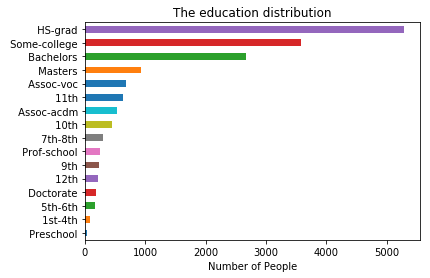

In [32]:
# 统计教育情况
s = df['education']
fig = s.value_counts(ascending=True).plot(kind='barh', 
                                        title='The Education Distribution')
plt.xlabel('Number of People')
plt.show()

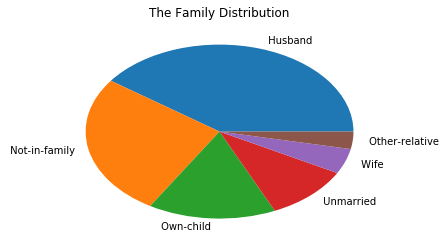

In [44]:
# 统计家庭情况
s = df['family']
fig = s.value_counts().plot(kind='pie', title='The Family Distribution', label='')
plt.show()

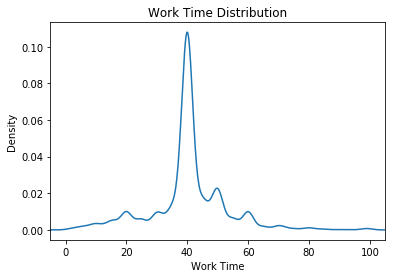

In [56]:
# 统计工作时间
s = df['work_time']
fig = s.plot(kind='kde', title='Work Time Distribution', label='')
plt.xlim((-5, 105))
plt.xlabel('Work Time')
plt.show()